In [135]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=5)
np.set_printoptions(suppress=True)

In [305]:
s = 5

In [256]:
def Logistic(y, mu, s):
    return np.exp((y-mu)/s)/(1+np.exp((y-mu)/s))**2

In [306]:
n = 50
x = np.linspace(-10, 10, n)
mu = 2 + 2*x
y = mu + np.random.logistic(0,s,n)

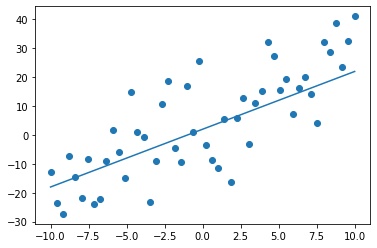

In [307]:
plt.scatter(x, y)
plt.plot(x, 2+2*x)

In [308]:
def ll(y, mu):
    return np.sum(np.log(Logistic(y, mu, s)))

In [309]:
def target(a):
    mu_t = a[0] + a[1]*x
    return ll(y, mu_t)

In [310]:
def grad(a):
    eps = 1e-10
    grad_a = (target([a[0] + eps, a[1]]) - target([a[0] - eps, a[1]]))/(2*eps)
    grad_b = (target([a[0], a[1] + eps]) - target([a[0], a[1] - eps]))/(2*eps)
    return np.array([grad_a, grad_b])

In [311]:
np.seterr(all='raise')
a = a0 = np.array([1,3], dtype=float)
lr = 1e-3
for i in range(20000):
    a = a + lr * grad(a)

In [312]:
a

array([4.12939, 2.47812])

In [313]:
loss(a)

-113.70603631075359

In [314]:
loss([2,2])

-117.31349639392167

In [315]:
X = np.column_stack([np.ones(50), x])

In [316]:
res = np.linalg.lstsq(X, y.reshape(-1,1))
b = res[0].squeeze()

C:\Users\david\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [317]:
a-b  # difference between regression coefficients (Logistic vs. Normal)

array([-0.13949,  0.05196])

In [318]:
target(a)

-113.70603631075359

In [319]:
target(b) # a bit lower...

-113.73959460043496

In [320]:
a

array([4.12939, 2.47812])

In [321]:
b

array([4.26888, 2.42616])

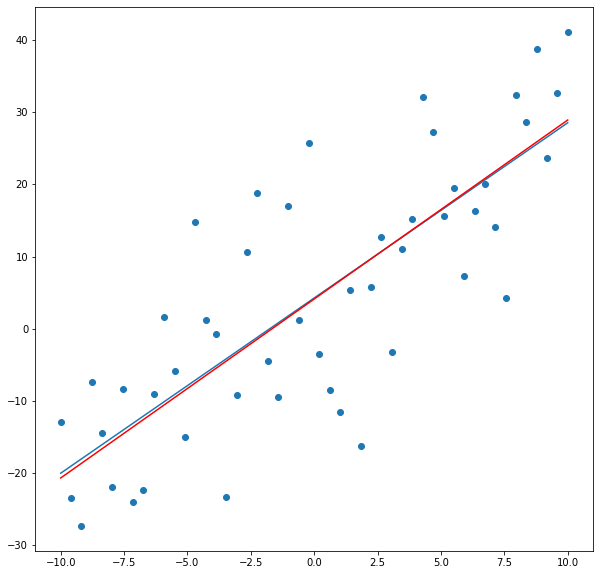

In [322]:
plt.figure(figsize=(10,10))
plt.scatter(x, y)
plt.plot(x, b[0]+b[1]*x)
plt.plot(x, a[0]+a[1]*x, c='r')

In [301]:
a[1]

1.9509625208938814

In [302]:
b[1]

1.9296923950955136